# Proyek Analisis Data: Nama dataset
- Nama: David Nurkhalik
- Email: davidnurkhalik30@gmail.com
- Id Dicoding: davidnurkhalik30

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 bagaimana jumlah perental sepeda pada setiap bulan dan musim ?
- pertanyaan 2 bagaimana jumlah perental sepeda pada hari libur, hari kerja?

## Menyiapkan semua library yang dibutuhkan

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [32]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [33]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


terdapat salah tipe data pada dteday, seharusnya datetime

Cek duplikasi dan deskripsi

In [34]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Membersihkan data hour.csv

terdapat salah tipe data pada dteday, seharusnya datetime pada hour.csv

In [35]:
datetime_columns = ["dteday",]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [36]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengganti season, month, weekday,year dan workingday 

In [37]:
# Mapping untuk mengganti nilai
season_mapping = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Mengganti nilai dalam kolom "season" secara langsung di DataFrame
hour_df['season'].replace(season_mapping, inplace=True)

In [38]:
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
hour_df['mnth'].replace(month_mapping, inplace=True)

In [39]:
weekday_mapping = {0: 'Monday', 1: 'Tuedday', 2: 'Wednesday', 3: 'Thursday', 4:'Friday',5:'Saturday',6:'Sunday'}
hour_df['weekday'].replace(weekday_mapping, inplace=True)

In [40]:
workingday_mapping = {0: 'Not Holiday', 1: 'Holiday'}
hour_df['workingday'].replace(workingday_mapping, inplace=True)

In [41]:
year_mapping = {0: '2011', 1: '2012'}
hour_df['yr'].replace(year_mapping, inplace=True)

In [42]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,Jan,0,0,Sunday,Not Holiday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,Jan,1,0,Sunday,Not Holiday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,Jan,2,0,Sunday,Not Holiday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,Jan,3,0,Sunday,Not Holiday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,Jan,4,0,Sunday,Not Holiday,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore data hour.csv

cek sample

In [43]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14197,14198,2012-08-19,Fall,2012,Aug,18,0,Monday,Not Holiday,2,0.64,0.5909,0.78,0.1045,86,291,377
7638,7639,2011-11-19,Winter,2011,Nov,21,0,Sunday,Not Holiday,2,0.36,0.3485,0.62,0.1940,29,79,108
5862,5863,2011-09-06,Fall,2011,Sep,18,0,Wednesday,Holiday,2,0.54,0.5152,0.88,0.3881,22,351,373
6240,6241,2011-09-22,Fall,2011,Sep,14,0,Friday,Holiday,2,0.66,0.6061,0.83,0.2239,41,142,183
1752,1753,2011-03-18,Springer,2011,Mar,17,0,Saturday,Holiday,1,0.70,0.6364,0.37,0.3284,95,237,332


In [44]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,NaN,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,NaN,Sunday,Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,NaN,2512,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,NaN,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,NaN,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'hr'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

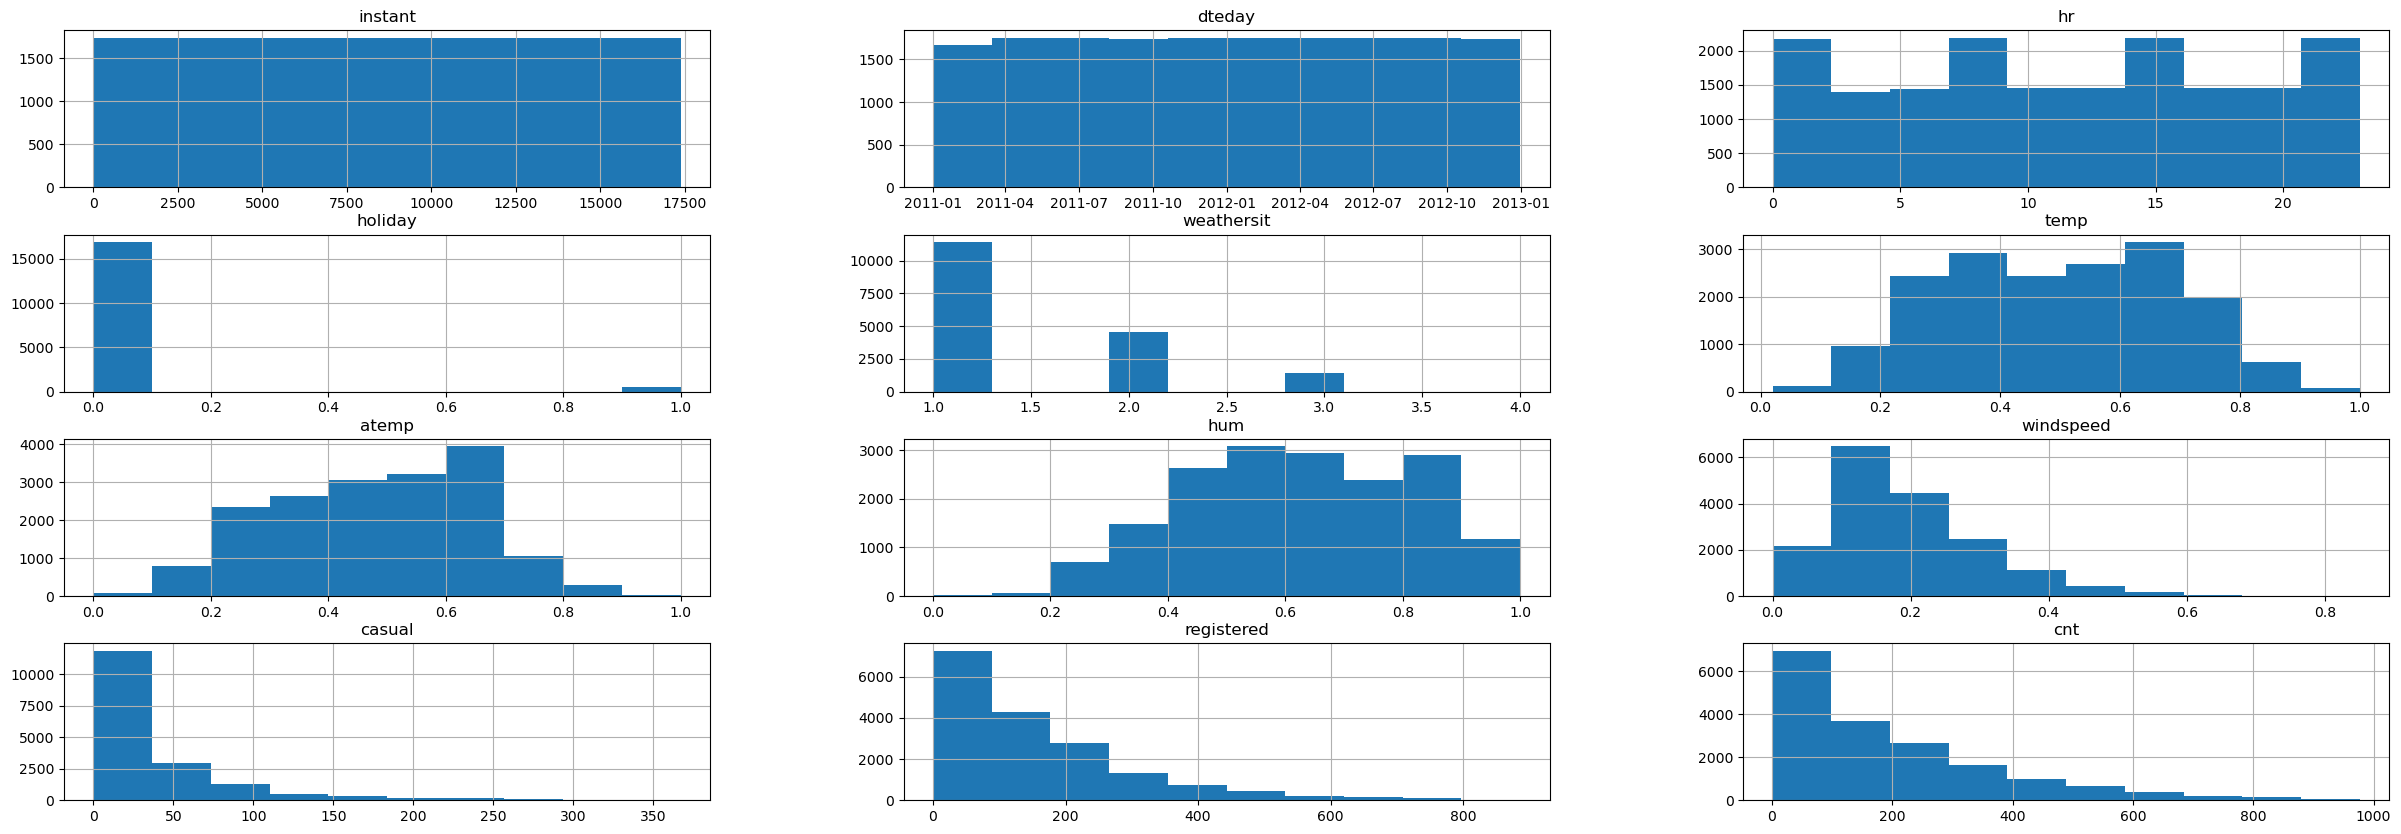

In [45]:
hour_df.hist(figsize=(30, 10))

## Visualization & Explanatory Analysis

### Pertanyaan 1: bagaimana jumlah perental sepeda pada setiap bulan dan musim 

Penyewa sepeda setiap musim dalam jam

In [54]:
byseason_df= hour_df.groupby(by="season").instant.nunique().reset_index()
byseason_df.rename(columns={"instant": "bike rental"}, inplace=True)
byseason_df.head()

,season,bike rental
0,Fall,4496
1,Springer,4242
2,Summer,4409
3,Winter,4232


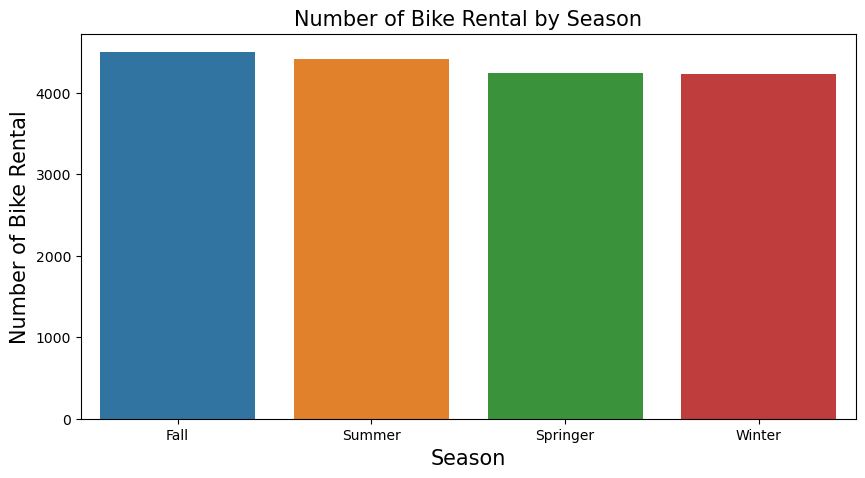

In [56]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="bike rental", 
    x="season",
    data=byseason_df.sort_values(by="bike rental", ascending=False),
)
plt.title("Number of Bike Rental by Season", loc="center", fontsize=15)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Number of Bike Rental", fontsize=15)
plt.xticks(rotation=0, ha='center')
plt.show()

Penyewa sepeda setiap bulan dalam jam

In [48]:
bymonth_df= hour_df.groupby(by="mnth").instant.nunique().reset_index()
bymonth_df.rename(columns={"instant": "bike rental"}, inplace=True)
bymonth_df.head()

,mnth,bike rental
0,Apr,1437
1,Aug,1475
2,Dec,1483
3,Feb,1341
4,Jan,1429


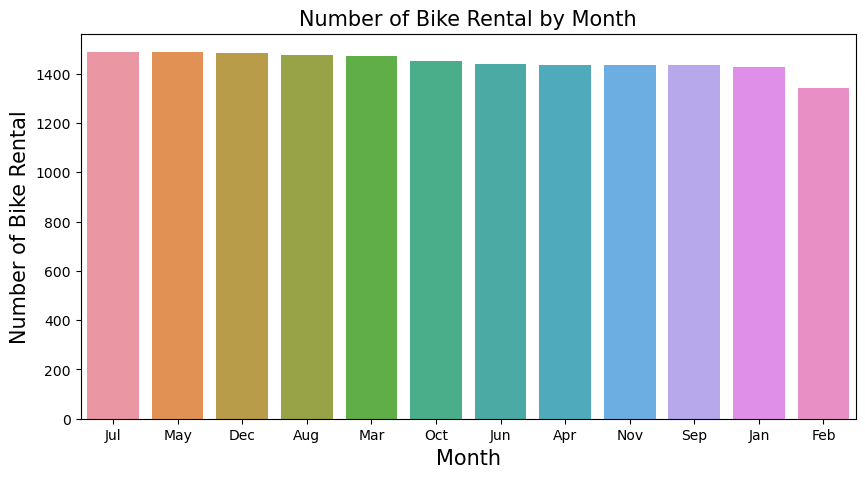

In [57]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="bike rental", 
    x="mnth",
    data=bymonth_df.sort_values(by="bike rental", ascending=False),
)
plt.title("Number of Bike Rental by Month", loc="center", fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Bike Rental", fontsize=15)
plt.xticks(rotation=0, ha='center')
plt.show()

### Pertanyaan 2: Bagaimana jumlah perental sepeda pada weekday dan workingday

perental sepeda berdasarkan weekday

In [50]:
byweekday_df= hour_df.groupby(by="weekday").instant.nunique().reset_index()
byweekday_df.rename(columns={"instant": "bike rental"}, inplace=True)
byweekday_df.head()

,weekday,bike rental
0,Friday,2471
1,Monday,2502
2,Saturday,2487
3,Sunday,2512
4,Thursday,2475


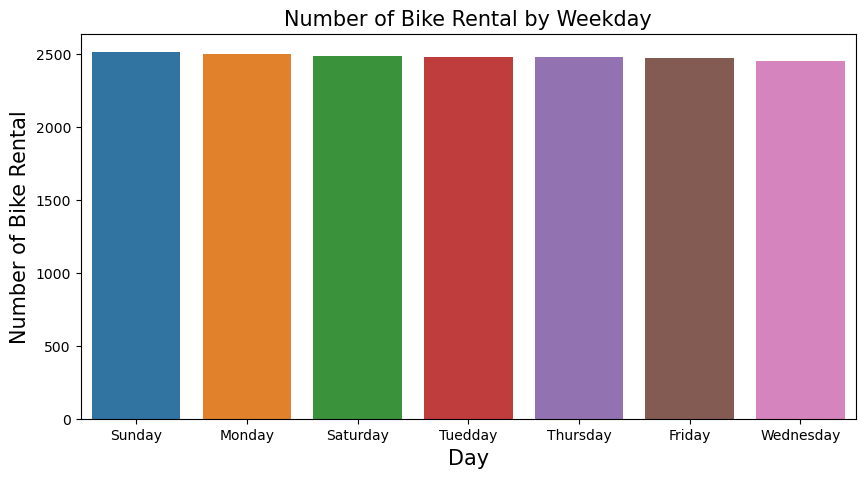

In [58]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="bike rental", 
    x="weekday",
    data=byweekday_df.sort_values(by="bike rental", ascending=False),
)
plt.title("Number of Bike Rental by Weekday", loc="center", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Number of Bike Rental", fontsize=15)
plt.xticks(rotation=0, ha='center')
plt.show()

Rental sepeda dalam working day

In [52]:
byworkingday_df= hour_df.groupby(by="workingday").instant.nunique().reset_index()
byworkingday_df.rename(columns={"instant": "bike rental"}, inplace=True)
byworkingday_df.head()

,workingday,bike rental
0,Holiday,11865
1,Not Holiday,5514


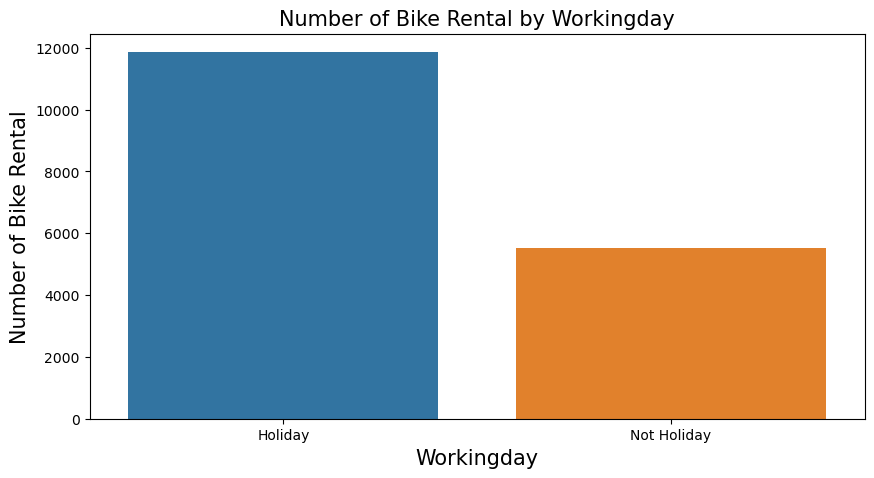

In [59]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="bike rental", 
    x="workingday",
    data=byworkingday_df.sort_values(by="bike rental", ascending=False),
)
plt.title("Number of Bike Rental by Workingday", loc="center", fontsize=15)
plt.xlabel("Workingday", fontsize=15)
plt.ylabel("Number of Bike Rental", fontsize=15)
plt.xticks(rotation=0, ha='center')
plt.show()

## Conclusion

- Conclution pertanyaan 1 Dapat disimpulkan bahwa berdasarkan musim jumlah rental sepeda paling banyak yaitu pada musim gugur sebanyak 4496 jam. dan berdasarkan bulan jumlah rental paling banyak yaitu pada bulan mei sebanyak 1488 jam

- Conclution pertanyaan 2 Dapat disimpulkan bahwa jumlah rental sepeda berdasarkan hari paling banyak hari minggu sebanyak 2502 jam dan para perental sepeda juga cendrung rental sepeda pada hari libur atau weekend.